<a href="https://colab.research.google.com/github/ateebioo/DG/blob/main/EDA_DG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt


In [5]:
import datetime

In [6]:
Cab_Data = pd.read_csv('https://raw.githubusercontent.com/ateebioo/DG/main/Cab_Data.csv')

In [7]:
City = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv")

In [8]:
Customer_ID = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')

In [9]:
Transaction_ID = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')

In [10]:
Cab_Data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [11]:
print(len(Cab_Data))

359392


In [12]:
Cab_Data.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

In [13]:
#cleaning the data
Cab_Data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [14]:
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [15]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [16]:
np.setdiff1d(City.City, Cab_Data.City)
# san francisco is not present in Cab_Data

array(['SAN FRANCISCO CA'], dtype=object)

In [17]:
Transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [18]:
len(np.setdiff1d(Transaction_ID['Transaction ID'], Cab_Data['Transaction ID']))
#numpy.setdiff1d() function find the set difference of two arrays and return the unique values in arr1 that are not in arr2.


80706

In [19]:
MergedData = pd.merge(Cab_Data, Transaction_ID, on = 'Transaction ID')
# 80,706 transaction ID's not present in the Cab_data dataset. These will be dropped when joining Transaction_ID with the Cab_data dataset


In [20]:
MergedData.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [21]:
# Checking for Customer ID's not in MergedData dataset

len(np.setdiff1d(Customer_ID['Customer ID'], MergedData['Customer ID']))

3023

In [22]:
fullmerged = pd.merge(MergedData, Customer_ID, on = 'Customer ID')
fullmerged.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [23]:
for col in fullmerged.columns:
    if ' ' in col:
        fullmerged = fullmerged.rename(columns={col:col.replace(' ','_')})

In [24]:
fullmerged.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [25]:
print(len(fullmerged))

359392


In [26]:
PinkCab = fullmerged[fullmerged['Company']=='Pink Cab']
YellowCab = fullmerged[fullmerged['Company']=='Yellow Cab']

In [27]:
PinkCab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
6,10395626,10/27/2018,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27,9237
7,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
11,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327


In [28]:
for col in PinkCab.columns:
    if ' ' in col:
        PinkCab = PinkCab.rename(columns={col:col.replace(' ','_')})

In [29]:
PinkCab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
6,10395626,10/27/2018,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27,9237
7,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
11,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327


In [30]:
YellowCab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237
5,10324737,5/4/2018,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237
8,10079404,9/21/2016,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242


In [31]:
print(len(PinkCab))

84711


In [32]:
for col in YellowCab.columns:
    if ' ' in col:
        YellowCab = YellowCab.rename(columns={col:col.replace(' ','_')})

In [33]:
PinkPlot = PinkCab[PinkCab.Company=='Pink Cab'].groupby(['City']).Transaction_ID.count()

In [34]:
PinkPlot

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

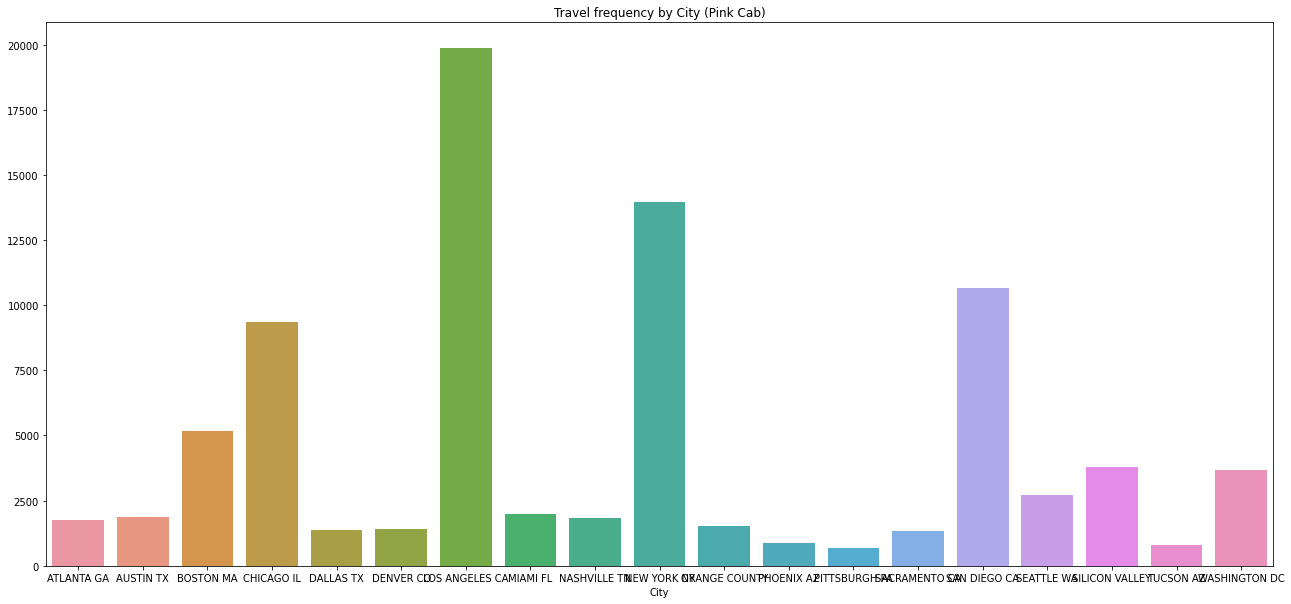

In [35]:
plt.figure(figsize=(22,10))
sns.barplot(x=PinkPlot.index,y=PinkPlot.values)
plt.title('Travel frequency by City (Pink Cab)')
plt.show()

In [36]:
YellowPlot = YellowCab[YellowCab.Company=='Yellow Cab'].groupby(['City']).Transaction_ID.count()

In [37]:
YellowPlot

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

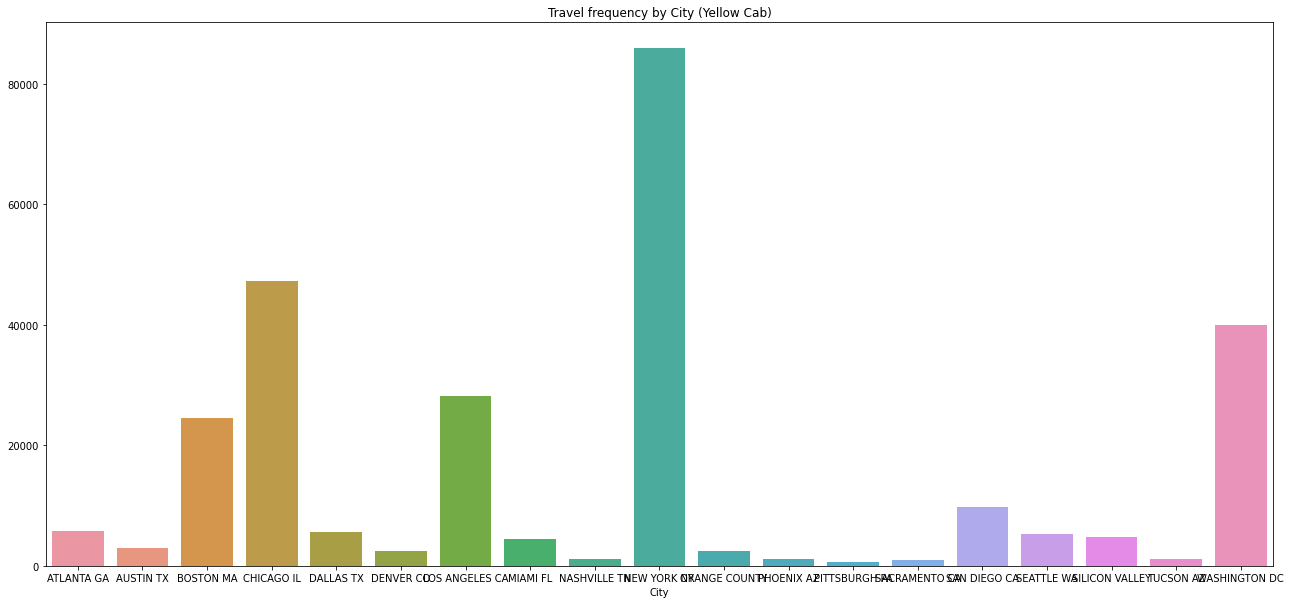

In [38]:
plt.figure(figsize=(22,10))
sns.barplot(x=YellowPlot.index,y=YellowPlot.values)
plt.title('Travel frequency by City (Yellow Cab)')
plt.show()

In [39]:
Overall_Dist = fullmerged['KM_Travelled'].describe()
PinkCab_Distance = PinkCab['KM_Travelled'].describe()
YellowCab_Distance = YellowCab['KM_Travelled'].describe()

In [40]:
FullStat = pd.DataFrame({'Overall': Overall_Dist.values,
                  'PinkCab': PinkCab_Distance.values,
                  'YellowCab': YellowCab_Distance.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
FullStat

,Overall,PinkCab,YellowCab
Count,359392.000000,84711.000000,274681.000000
Mean,22.567254,22.559917,22.569517
Std. Dev.,12.233526,12.231092,12.234298
Min,1.900000,1.900000,1.900000
25%,12.000000,12.000000,11.990000
50%,22.440000,22.440000,22.440000
75%,32.960000,32.960000,32.960000
Max,48.000000,48.000000,48.000000


Text(-2.575000000000003, 0.5, 'frequency')

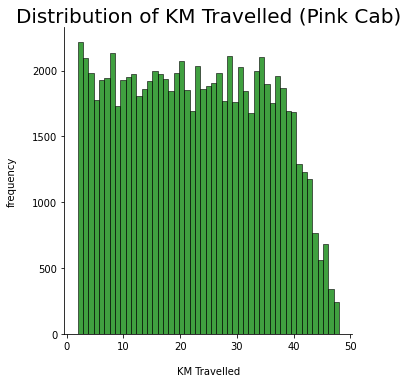

In [41]:
ax = sns.displot(PinkCab['KM_Travelled'], kde=False, color='green')
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)

Text(-2.450000000000003, 0.5, 'frequency')

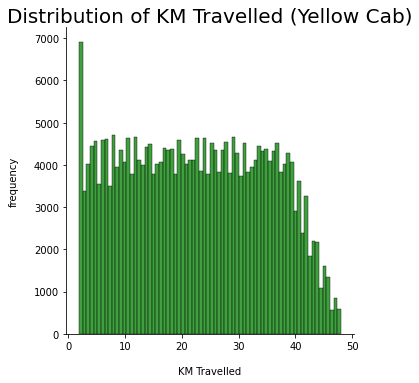

In [42]:
ax = sns.displot(YellowCab['KM_Travelled'], kde=False, color='green')
plt.title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)

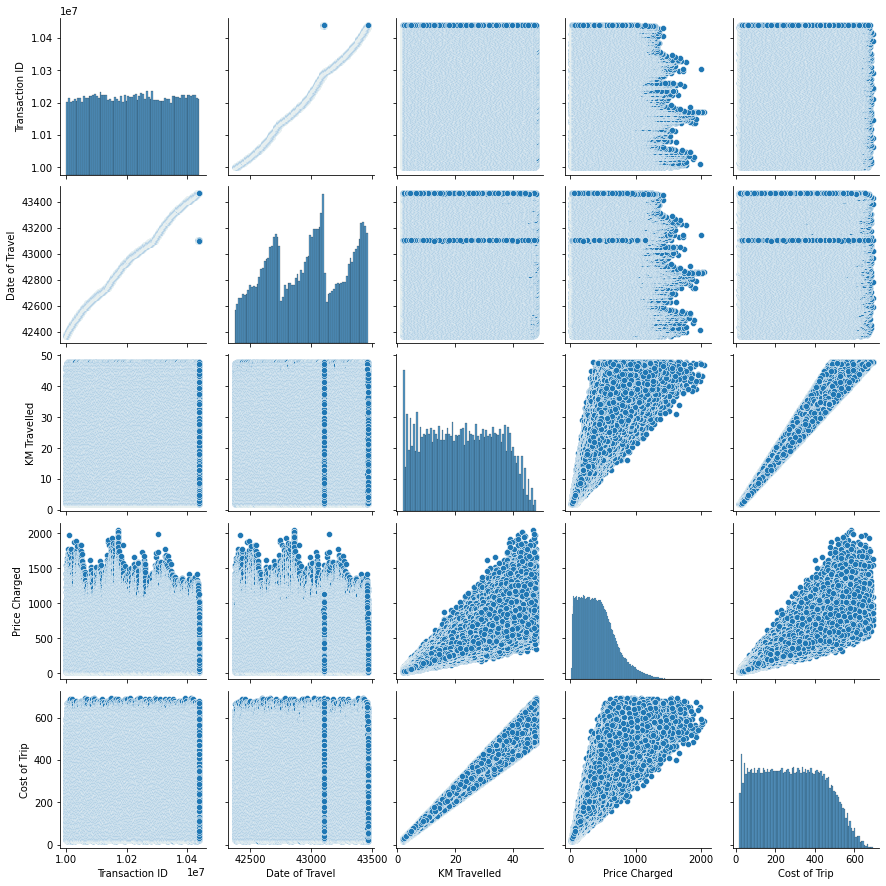

In [ ]:
#relationship analysis
sns.pairplot(Cab_Data)

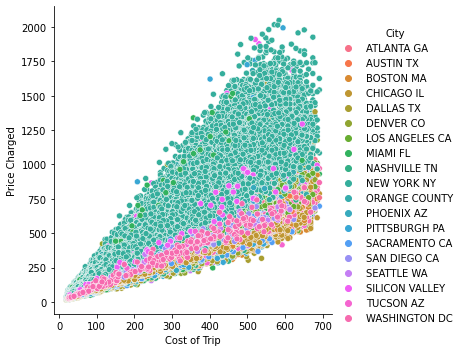

In [ ]:
sns.relplot( x='Cost of Trip', y='Price Charged' , hue='City' , data = Cab_Data )

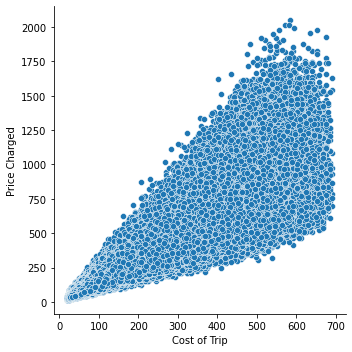

In [ ]:
sns.relplot( x='Cost of Trip', y='Price Charged' , data = Cab_Data )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


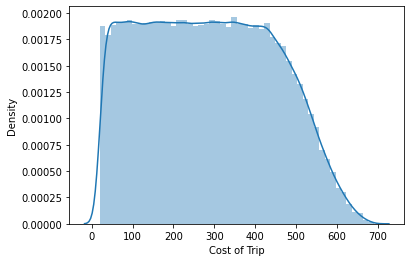

In [ ]:
sns.distplot(Cab_Data['Cost of Trip'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


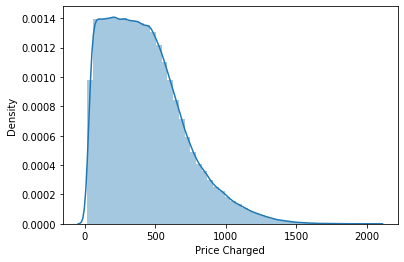

In [ ]:
sns.distplot(Cab_Data['Price Charged'])

In [ ]:
duplicateValues = Cab_Data.duplicated()
print(duplicateValues.sum())

0


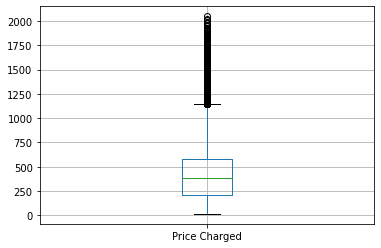

In [ ]:
Cab_Data.boxplot(column='Price Charged')

In [ ]:
cor = Cab_Data.corr()

NameError: ignored

In [ ]:
sns.heatmap(Cab_Data , )

NameError: ignored